## Importing Dependencies

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder

### Ignoring Warnings

In [111]:
import warnings
warnings.filterwarnings("ignore")

# Predict if the client will subscribe to a term deposit based on the analysis of the
# marketing campaigns the bank performed

In [112]:
data = pd.read_csv("bank.csv" , sep = ";") # importing Data, sep = ";"
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## CHecking Null values

In [113]:
data.isnull().sum() # Checking Null Values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [114]:
data.shape

(41188, 21)

### Label Encoding

In [115]:
data["y"] = data.y.map({"yes" : 1 , "no" : 0}) #Label enconding the final output to 0 - 1
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


## Cleaning Data

In [116]:
data = data.drop(columns= ["euribor3m"] , axis = 0) # Dropping not so important columns
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,4963.6,1


In [118]:
#Changing Object data types to categorical

data.job = data.job.astype("category")
data.marital = data.marital.astype("category")
data.education = data.education.astype("category")
data.default = data.default.astype("category")
data.housing = data.housing.astype("category")
data.loan = data.loan.astype("category")
data.contact = data.contact.astype("category")
data.month = data.month.astype("category")
data.day_of_week = data.day_of_week.astype("category")
data.poutcome = data.poutcome.astype("category")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

# PLOTS

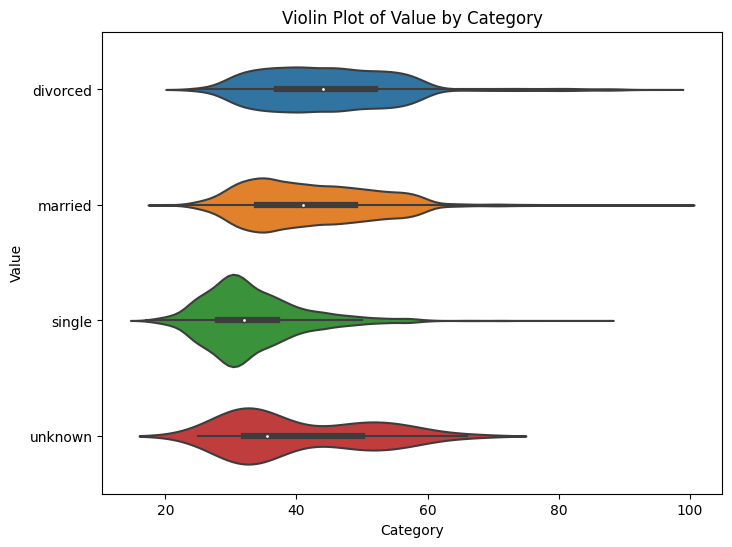

In [119]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='age', y='marital', data=data)
plt.title('Violin Plot of Value by Category')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()

Text(0.5, 1.0, 'Histogram age')

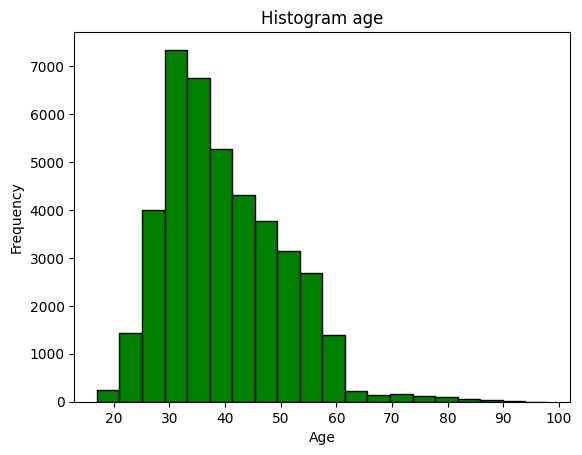

In [120]:
plt.hist(data.age , bins=20, color='green', edgecolor='black')

# Add labels and a title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram age')

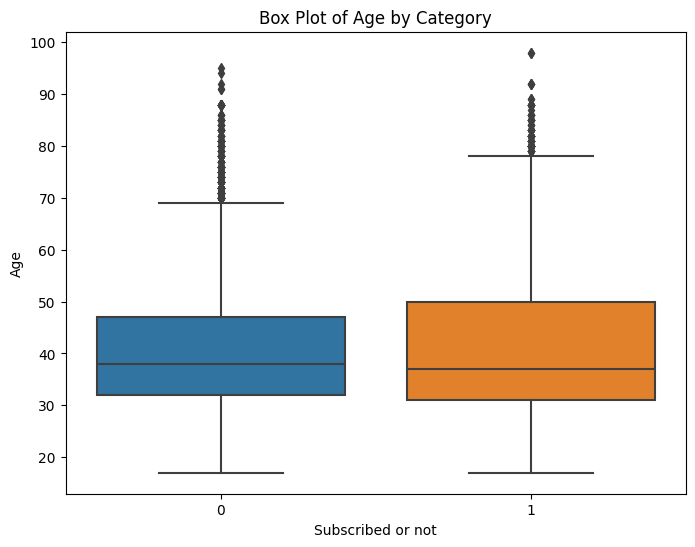

In [121]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='age', data=data)
plt.title('Box Plot of Age by Category')
plt.xlabel('Subscribed or not')
plt.ylabel('Age')
plt.show()

## Correlation

In [122]:
data[["age" , "y"]].corr()

,age,y
age,1.000000,0.030399
y,0.030399,1.000000


In [123]:
data[["duration" , "y"]].corr()

,duration,y
duration,1.000000,0.405274
y,0.405274,1.000000


In [124]:
data[["cons.price.idx" , "y"]].corr()

,cons.price.idx,y
cons.price.idx,1.000000,-0.136211
y,-0.136211,1.000000


In [125]:
data[["emp.var.rate" , "y"]].corr()

,emp.var.rate,y
emp.var.rate,1.000000,-0.298334
y,-0.298334,1.000000


In [126]:
data[["cons.conf.idx" , "y"]].corr()

,cons.conf.idx,y
cons.conf.idx,1.000000,0.054878
y,0.054878,1.000000


In [127]:
data.poutcome = data.poutcome.map({"nonexistent" : 2 , "failure" : 0 , "success" : 1})

# XGBoost Machine learning model

In [130]:
# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Define a parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],   # Number of trees (you can customize)
    'max_depth': [3, 4, 5],           # Maximum tree depth (you can customize)
    'learning_rate': [0.1, 0.01, 0.001],  # Learning rate (you can customize)
}

In [132]:
data_encoded = pd.get_dummies(data)

In [137]:
# Split the dataset into features (X) and target (y)
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:


# Define the parameter grid for GridSearchCV

param_grid = {
    'objective': ['multi:softmax'],  # For multiclass classification
    'eval_metric': ['mlogloss'],     # Evaluation metric
    'num_class': [len(data['y'].unique())],  # Number of unique categories
    'max_depth': [3, 4, 5],  # Example hyperparameter options
    'learning_rate': [0.1, 0.01, 0.001]  # Example hyperparameter options
}


# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1)



# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [143]:
y_test

32884    0
3169     0
32206    0
9403     0
14020    0
        ..
12322    1
23440    0
29431    0
16627    1
1871     0
Name: y, Length: 8238, dtype: int64

# Metrics

In [144]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' takes class imbalance into account

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # 'weighted' takes class imbalance into account

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' takes class imbalance into account

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print the classification report
print('\nClassification Report:\n', classification_rep)

# Print the confusion matrix
print('\nConfusion Matrix:\n', confusion_mat)


Accuracy: 0.92
Precision: 0.91
Recall: 0.92
F1 Score: 0.91

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7303
           1       0.68      0.52      0.59       935

    accuracy                           0.92      8238
   macro avg       0.81      0.74      0.77      8238
weighted avg       0.91      0.92      0.91      8238


Confusion Matrix:
 [[7080  223]
 [ 451  484]]


In [158]:
importance = best_model.feature_importances_

# Get the names of all features
feature_names = X.columns  # Assuming X is your feature matrix

# Create a list of (feature_name, importance_score) pairs
feature_importance_pairs = [(feature_names[i], importance[i]) for i in range(len(feature_names))]

# Sort the feature_importance_pairs by importance score in descending order
feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)

# Extract the top 10 most important features
top_10_features = [pair[0] for pair in feature_importance_pairs[:10]]

# Display the top 10 features
print("Top 10 Most Important Features:")
for feature in top_10_features:
    print(feature)

Top 10 Most Important Features:
nr.employed
duration
emp.var.rate
cons.conf.idx
poutcome_1
pdays
month_may
cons.price.idx
default_no
month_oct


<Figure size 10000x10000 with 0 Axes>

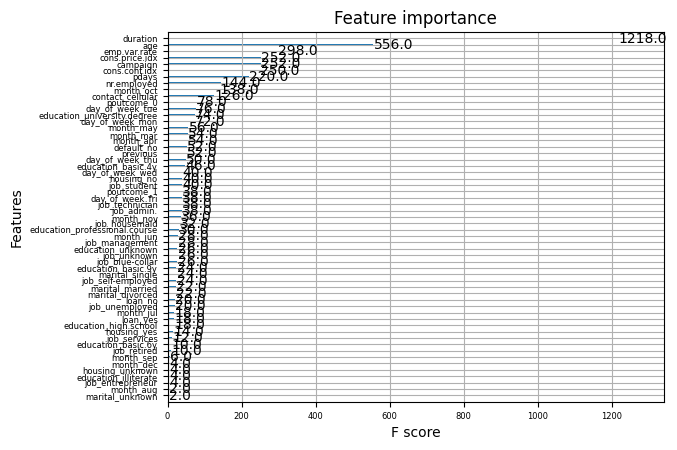

In [166]:

plt.figure(figsize=(100,100))
# Assuming you have trained an XGBoost model called 'model'
xgb.plot_importance(best_model, importance_type='weight')  # You can also use 'gain' or 'cover'
plt.xticks(fontsize=6)  # Set font size for x-axis tick labels
plt.yticks(fontsize=6) 
plt.show()
